In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
clf = DecisionTreeClassifier()
params = {'max_depth': [i for i in range(1,11)], 'min_samples_split': [i for i in range(2,11)],'min_samples_leaf': [i for i in range(1,11)]}
search = GridSearchCV(estimator=clf, param_grid=params)
search.fit(X, y)
best_tree = search.best_estimator_
search.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [3]:
from sklearn.metrics import confusion_matrix

predictions = best_tree.predict(X)
conf_matrix = confusion_matrix(y, predictions)

In [4]:
conf_matrix

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

In [5]:
!pip install dvc[all]

     -------------------------------------- 448.1/448.1 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 70.9/70.9 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 46.6/46.6 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 68.5/68.5 kB 1.9 MB/s eta 0:00:00
     ------------------------------------ 116.4/116.4 kB 487.1 kB/s eta 0:00:00
     -------------------------------------- 240.6/240.6 kB 1.6 MB/s eta 0:00:00
     -------------------------------------- 154.5/154.5 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 41.8/41.8 kB ? eta 0:00:00
     ---------------------------------------- 45.5/45.5 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 487.5/487.5 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 200.0/200.0 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 422.0/422.0 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 4

ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'C:\\Users\\ACER\\AppData\\Local\\Temp\\pip-uninstall-8at2iy5l\\_cffi_backend.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [19]:
!dvc init

ERROR: failed to initiate DVC - '.dvc' exists. Use `-f` to force.


In [20]:
!dvc pull

Everything is up to date.

No remote provided and no default remote set.


ERROR: failed to pull data from the cloud - Checkout failed for following targets:
dvclive
Is your cache up to date?
<https://error.dvc.org/missing-files>


In [21]:
!dvc stage add --name train --outs dvclive python train.py

ERROR: Stage 'train' already exists in 'dvc.yaml'. Use '--force' to overwrite.


In [22]:
!dvc exp run

Reproducing experiment 'gouty-toff'


Running stage 'train':
> python train.py
Updating lock file 'dvc.lock'

Ran experiment(s): gouty-toff
Experiment results have been applied to your workspace.


	results.png


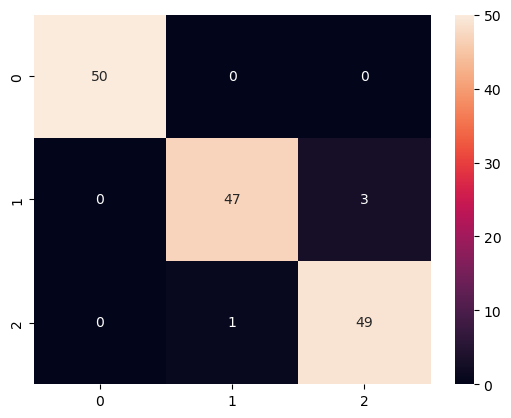

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from dvclive import Live
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix

with Live() as live:
    live.log_param("epochs", 1)

    for i in range(1, 5):
        for j in range(2, 5):
            for k in range(1, 5):
                plt.clf()
                clf = DecisionTreeClassifier(max_depth=i, min_samples_split=j, min_samples_leaf=k)
                clf.fit(X, y)
                y_pred = clf.predict(X)
                live.log_metric('Precision', precision_score(y, y_pred, average='micro'))
                live.log_metric('Recall', recall_score(y, y_pred, average='micro'))
                live.log_sklearn_plot("confusion_matrix", y, y_pred)
                conf_matrix = confusion_matrix(y, predictions)
                sns_plot = sns.heatmap(conf_matrix, annot=True)
                results_path = 'results.png'
                plt.savefig(results_path)
                live.log_image(f"img/{live.step}.png", 'results.png')
                live.next_step()